# ***Credit Card Fraud Detection***
Fraud Detection Analysis on Credit Card data of European Cardholders. The data is obtained from Kaggle and has 30 features in total. The main goal of this classification task was to identify fradulent transactions. I have used Random Forest and Logistic Regression as the algorithms for classification. Metrics used to compare both of these algorithms are Precision, Recall, F1 score etc.
After comparing all the metrics for both algorithms, Random Forest turns out to be working better.

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression


In [27]:
data = pd.read_csv("creditcard.csv") 
data.head()
#print(data.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [28]:
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0]
fraudTransaction=len(fraud)/len(valid)
print("fraudTransaction Ratio" + " " + str(fraudTransaction))

fraudTransaction Ratio 0.0017304750013189597


Correlation Matrix helps to analyze how features are interrelated. In the below heatmap lighter shade indicates low correlation while higher indicates high correlation.

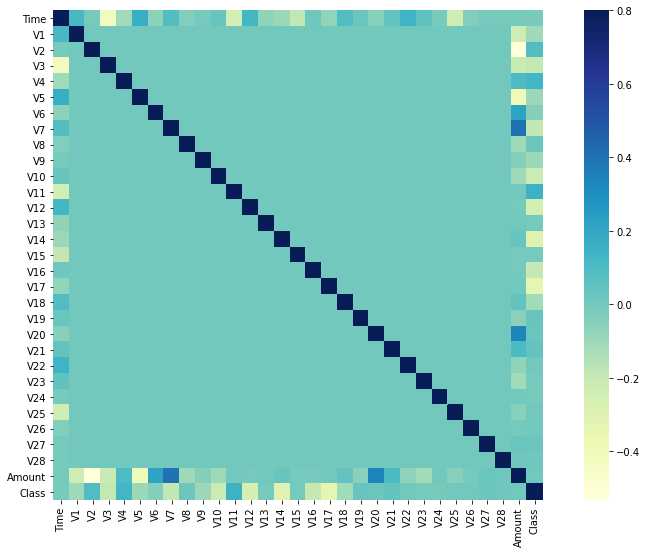

In [29]:
# Correlation matrix 
corrmat = data.corr() 
fig = plt.figure(figsize = (15, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True,cmap="YlGnBu") 
plt.show() 

In [30]:
# dividing the X and the Y from the dataset 
data.dropna()
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
xData = X.values 
yData = Y.values 

(284807, 30)
(284807,)


In [0]:
#Splitting of Data
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42) 

**Random Forest Classifier**

In [32]:
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
yPred = rfc.predict(xTest)
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 


The model used is Random Forest classifier


In [22]:
# Evaluating the classifier 
# scoring in anything 

n_outliers = len(fraud) 
  
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC))

The accuracy is 0.9995962220427653
The precision is 0.9746835443037974
The recall is 0.7857142857142857
The F1-Score is 0.8700564971751412
The Matthews correlation coefficient is0.8749276812909632


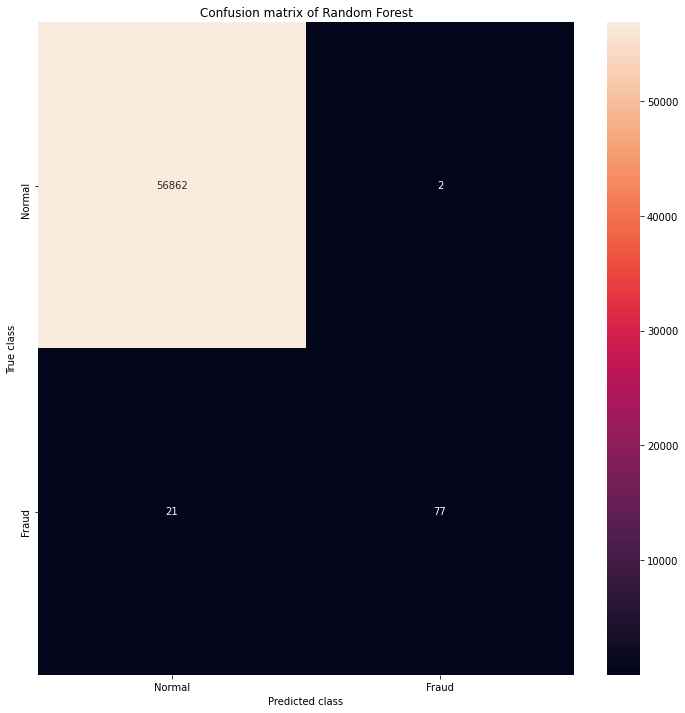

In [23]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix of Random Forest") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()

**Logistic Regression**

In [0]:
lr=LogisticRegression()
lr.fit(xTrain,yTrain)
yPred=lr.predict(xTest)
n_errors = (yPred != yTest).sum() 
print("The model used is Logistic Regression") 


In [25]:
# Evaluating the classifier 
# scoring in anything 

n_outliers = len(fraud) 
  
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC))

The accuracy is 0.9985955549313578
The precision is 0.6022727272727273
The recall is 0.5408163265306123
The F1-Score is 0.5698924731182796
The Matthews correlation coefficient is0.5700182485775456


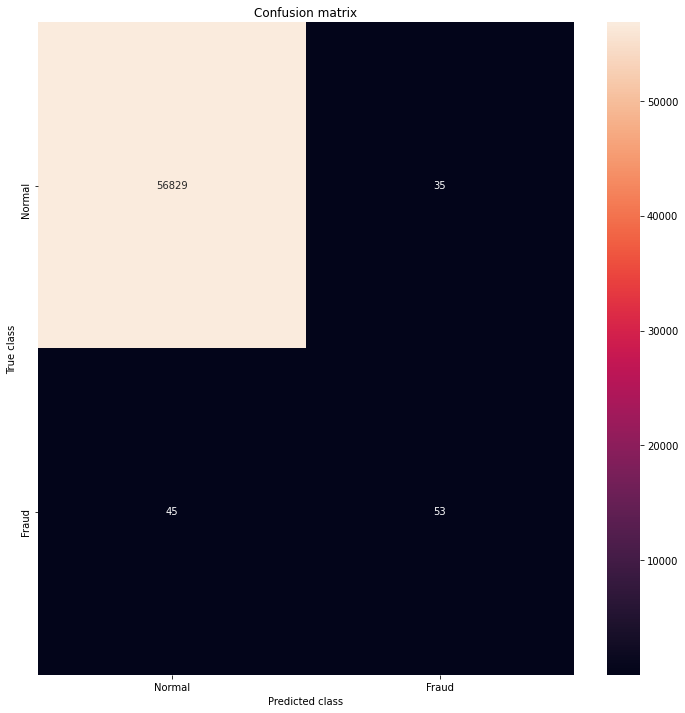

In [19]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix of Logistic Regression") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show()